# ANLY590 HW3
## Zikai Zhu

### Problem 1

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K
import numpy as np
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
input_img = Input(shape=(28,28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
autoencoder.fit(x_train, x_train, 
          epochs=5, 
          batch_size = 128,
          shuffle=True, 
          validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 246s 4ms/step - loss: 0.3731 - val_loss: 0.3272
Epoch 2/5
60000/60000 [==============================] - 244s 4ms/step - loss: 0.3227 - val_loss: 0.3182
Epoch 3/5
60000/60000 [==============================] - 233s 4ms/step - loss: 0.3130 - val_loss: 0.3095
Epoch 4/5
60000/60000 [==============================] - 243s 4ms/step - loss: 0.3081 - val_loss: 0.3066
Epoch 5/5
60000/60000 [==============================] - 245s 4ms/step - loss: 0.3050 - val_loss: 0.3007


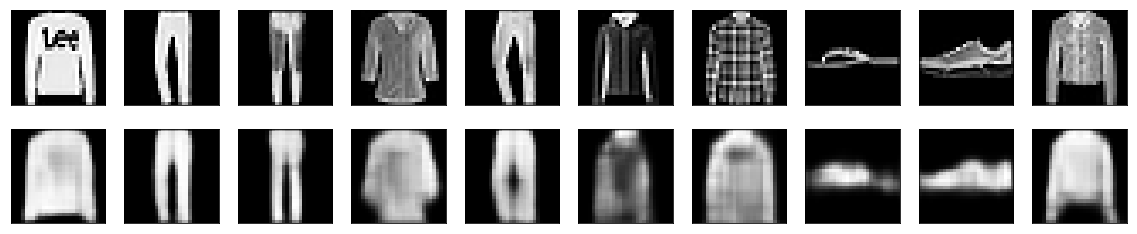

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Problem 2

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, LeakyReLU

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #flatten in order to run ANN
model.add(Dense(128, activation = 'relu')) #using 128 parameters
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))#output 10 results to classify 10 classes

model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history_dCNN = model.fit(x_train, y_train, 
          epochs=5, 
          batch_size=32,
          validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 233s 4ms/step - loss: 0.5340 - acc: 0.8027 - val_loss: 0.3513 - val_acc: 0.8753
Epoch 2/5
60000/60000 [==============================] - 212s 4ms/step - loss: 0.3422 - acc: 0.8766 - val_loss: 0.3085 - val_acc: 0.8882
Epoch 3/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.2974 - acc: 0.8932 - val_loss: 0.2656 - val_acc: 0.9034
Epoch 4/5
60000/60000 [==============================] - 202s 3ms/step - loss: 0.2739 - acc: 0.9024 - val_loss: 0.2554 - val_acc: 0.9107
Epoch 5/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.2593 - acc: 0.9061 - val_loss: 0.2515 - val_acc: 0.9087


In [36]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

10000/10000 [==============================] - 8s 844us/step
[0.25149928634762764, 0.9087]
60000/60000 [==============================] - 43s 710us/step
[0.21266513683398564, 0.9211166666666667]


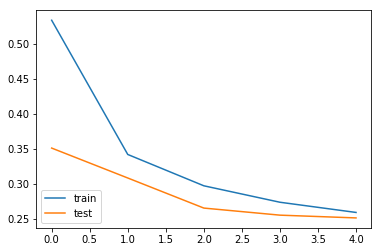

In [37]:
plt.plot(history_dCNN.history['loss'])
plt.plot(history_dCNN.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

It shows the model is overfitting.

In [4]:
#2.2
from keras.applications import VGG16
import skimage
from skimage.transform import resize
from tqdm import tqdm
from keras.models import Sequential

from keras import backend as K
from keras.layers import Lambda, Input
from keras.models import Model
import cv2

In [7]:
x_train1 = np.asarray([cv2.resize(i, (32,32)) for i in x_train])
x_test1 = np.asarray([cv2.resize(i, (32,32)) for i in x_test])

In [8]:
x_train1 = x_train1.reshape(x_train1.shape[0], 32, 32,1)
x_test1 = x_test1.reshape(x_test1.shape[0], 32, 32, 1)

In [9]:
x_train1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_train1])
x_test1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_test1])

In [10]:
conv_base = VGG16(weights = "imagenet", include_top=False, input_shape = (32,32,3))

In [11]:
T_model = Sequential()
T_model.add(conv_base)
T_model.add(Flatten())
T_model.add(Dense(256, activation="relu"))
T_model.add(Dense(10, activation="softmax"))

In [12]:
conv_base.trainable = False

In [13]:
T_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [14]:
history = T_model.fit(x_train1,y_train, 
                    epochs=10, 
                    batch_size=150,
                    verbose = 1,
                    validation_data = (x_test1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1319s 22ms/step - loss: 0.5905 - acc: 0.7956 - val_loss: 0.4570 - val_acc: 0.8383
Epoch 2/10
60000/60000 [==============================] - 1347s 22ms/step - loss: 0.4213 - acc: 0.8461 - val_loss: 0.4244 - val_acc: 0.8491
Epoch 3/10
60000/60000 [==============================] - 1419s 24ms/step - loss: 0.3875 - acc: 0.8578 - val_loss: 0.4094 - val_acc: 0.8558
Epoch 4/10
60000/60000 [==============================] - 1289s 21ms/step - loss: 0.3665 - acc: 0.8647 - val_loss: 0.3922 - val_acc: 0.8609
Epoch 5/10
60000/60000 [==============================] - 1316s 22ms/step - loss: 0.3497 - acc: 0.8716 - val_loss: 0.3882 - val_acc: 0.8603
Epoch 6/10
60000/60000 [==============================] - 7179s 120ms/step - loss: 0.3381 - acc: 0.8756 - val_loss: 0.3899 - val_acc: 0.8607
Epoch 7/10
60000/60000 [==============================] - 13328s 222ms/step - loss: 0.3263 - acc: 0.8808 - va

In [15]:
print(T_model.evaluate(x_test1, y_test))
print(T_model.evaluate(x_train1, y_train))

10000/10000 [==============================] - 198s 20ms/step
[0.3789451290845871, 0.8645]
60000/60000 [==============================] - 1224s 20ms/step
[0.29232427151203155, 0.8908333333333334]


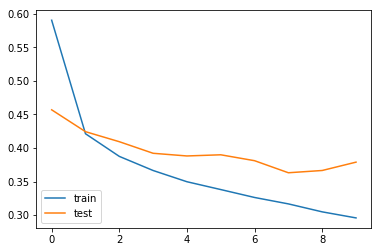

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

### Problem 3

In [17]:
import pandas as pd
import nltk
import collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Dropout, Activation, Flatten, GlobalMaxPooling1D, LSTM
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.utils import class_weight
from keras.layers import LSTM, Conv1D, GlobalMaxPooling1D
import regex as re
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import sequence

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Cassie/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/Cassie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Cassie/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
tweets = pd.read_csv('tweets_with_labels.csv', sep = '\t')

# clean tweets
stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweets(tweet):
    tweet = re.sub("@mention", "",tweet)
    tweet = re.sub("{link}", "",tweet)
    tweet = re.sub("[^A-Za-z]"," ",tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    tweet = re.sub("\s+"," ",tweet)
    tokens = word_tokenize(tweet)
    words = [word for word in tokens if word not in stopWords]
    words = [stemmer.stem(w).strip("'") for w in words]
    words = [lemmatizer.lemmatize(w, pos="a") for w in words]
    words = [word for word in words if len(word)!=1]
    final_tweet = ' '.join(words)
    return final_tweet

new_tweet = [preprocess_tweets(x) for x in list(tweets.tweet)]
tweets['new_tweets'] = new_tweet

In [19]:
token = [word_tokenize(x) for x in list(tweets.new_tweets)]

# clean out empty new_tweets by removing them
remove_lst=[]
for w in token:
    remove_lst.append(len(w))
bad_idx = [n for n,x in enumerate(remove_lst) if x == 0]
tweets_updated = tweets.drop(bad_idx)

In [20]:
# preprocess finished and define X and y for train test split

X = [word_tokenize(x) for x in list(tweets_updated['new_tweets'])]

# label y for any k1 to k15 not equal to 0
label = tweets_updated.loc[:,'k1':'k15']
label[tweets_updated != 0] = 1
y = label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print('X_train shape: ', len(X_train))
print('X_test shape: ', len(X_test))
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  54551
X_test shape:  23379
y_train shape:  (54551, 15)
y_test shape:  (23379, 15)


In [21]:
# padding token sequense to max length of 40
X_train_padded = sequence.pad_sequences(X_train, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)
X_test_padded = sequence.pad_sequences(X_test, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)

train_corpus = list(tweets_updated.new_tweets)
train_cor_tk = [word_tokenize(x) for x in train_corpus]
corpus_padded = sequence.pad_sequences(train_cor_tk, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)

corpus_padded = corpus_padded.tolist()
X_train_padded = X_train_padded.tolist()
X_test_padded = X_test_padded.tolist()

In [22]:
# train word2vec and vectorizing training set and test set 
w2v_model = Word2Vec(corpus_padded, min_count=1, size = 20, workers=1, window=3)

# vector with size train/test, maxlen = 40 
X_train_vec = np.empty([len(X_train), 40, 20])
X_test_vec = np.empty([len(X_test), 40, 20])

idx_train = 0
for w in X_train_padded:
    X_train_vec[idx_train, :, :] = w2v_model[w]
    idx_train += 1

idx_test = 0
for w in X_test_padded:
    X_test_vec[idx_test,:,:] = w2v_model[w]
    idx_test += 1

print('X_train_vec shape: ', X_train_vec.shape)
print('X_test_vec shape: ', X_test_vec.shape)

/Users/Cassie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/Cassie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


X_train_vec shape:  (54551, 40, 20)
X_test_vec shape:  (23379, 40, 20)


In [23]:
# Build LSTM model
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape = (40, 20)))
model_rnn.add(Dense(128, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(64, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(15, activation ='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model_rnn.fit(X_train_vec, y_train,
                        epochs=10, batch_size=500,
                        validation_data=(X_test_vec, y_test))

Train on 54551 samples, validate on 23379 samples
Epoch 1/10
54551/54551 [==============================] - 222s 4ms/step - loss: 0.3893 - acc: 0.8432 - val_loss: 0.3222 - val_acc: 0.8748
Epoch 2/10
54551/54551 [==============================] - 200s 4ms/step - loss: 0.3314 - acc: 0.8728 - val_loss: 0.3213 - val_acc: 0.8748
Epoch 3/10
54551/54551 [==============================] - 206s 4ms/step - loss: 0.3276 - acc: 0.8738 - val_loss: 0.3211 - val_acc: 0.8748
Epoch 4/10
54551/54551 [==============================] - 201s 4ms/step - loss: 0.3261 - acc: 0.8743 - val_loss: 0.3210 - val_acc: 0.8748
Epoch 5/10
54551/54551 [==============================] - 201s 4ms/step - loss: 0.3252 - acc: 0.8745 - val_loss: 0.3210 - val_acc: 0.8748
Epoch 6/10
54551/54551 [==============================] - 209s 4ms/step - loss: 0.3245 - acc: 0.8746 - val_loss: 0.3190 - val_acc: 0.8748
Epoch 7/10
54551/54551 [==============================] - 195s 4ms/step - loss: 0.2989 - acc: 0.8796 - val_loss: 0.2451 - 

In [24]:
score = model_rnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)
from sklearn import metrics
import matplotlib.pyplot as plt

print('Train loss: ', history.history['loss'][9]) 
print('Train accuracy: ', history.history['acc'][9])

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train loss:  0.17514417331047524
Train accuracy:  0.9383600887905935
Test loss:  0.1605905552159537
Test accuracy:  0.9419365368732165


In [25]:
#3.2

model_cnn = Sequential()
model_cnn.add(Conv1D(128, 3, activation='relu', padding = 'valid', strides=1, input_shape=(40,20)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64))
model_cnn.add(Dropout(0.2))
model_cnn.add(Activation('relu'))
model_cnn.add(Dense(15, activation ='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_vec, y_train, epochs=10, batch_size=128,
                        validation_data=(X_test_vec, y_test))

Train on 54551 samples, validate on 23379 samples
Epoch 1/10
54551/54551 [==============================] - 70s 1ms/step - loss: 0.2237 - acc: 0.9187 - val_loss: 0.1664 - val_acc: 0.9405
Epoch 2/10
54551/54551 [==============================] - 55s 1ms/step - loss: 0.1725 - acc: 0.9398 - val_loss: 0.1576 - val_acc: 0.9436
Epoch 3/10
54551/54551 [==============================] - 59s 1ms/step - loss: 0.1647 - acc: 0.9424 - val_loss: 0.1547 - val_acc: 0.9447
Epoch 4/10
54551/54551 [==============================] - 51s 929us/step - loss: 0.1608 - acc: 0.9435 - val_loss: 0.1521 - val_acc: 0.9453
Epoch 5/10
54551/54551 [==============================] - 57s 1ms/step - loss: 0.1590 - acc: 0.9440 - val_loss: 0.1505 - val_acc: 0.9457
Epoch 6/10
54551/54551 [==============================] - 59s 1ms/step - loss: 0.1570 - acc: 0.9446 - val_loss: 0.1497 - val_acc: 0.9458
Epoch 7/10
54551/54551 [==============================] - 50s 915us/step - loss: 0.1553 - acc: 0.9448 - val_loss: 0.1483 - val

In [26]:
score_cnn = model_cnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)

print('Train loss: ', history_cnn.history['loss'][9]) 
print('Train accuracy: ', history_cnn.history['acc'][9])

print('Test loss: ', score_cnn[0])
print('Test accuracy: ', score_cnn[1])

Train loss:  0.15205840142450092
Train accuracy:  0.9457338564706346
Test loss:  0.146402376554414
Test accuracy:  0.947266102166043


Text(0.5,1,'Text Classification Accuracy RNN CNN Comparison')

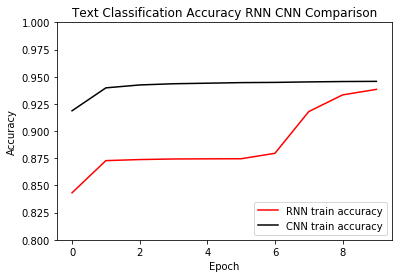

In [27]:
## 3.3

plt.plot(history.history['acc'], label='RNN train accuracy', color = 'r')
plt.plot(history_cnn.history['acc'], label = 'CNN train accuracy', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Text Classification Accuracy RNN CNN Comparison')

Text(0.5,1,'Text Classification Loss RNN CNN Comparison')

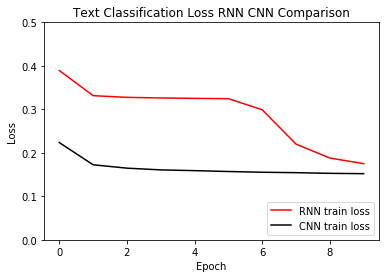

In [28]:
plt.plot(history.history['loss'], label='RNN train loss', color = 'r')
plt.plot(history_cnn.history['loss'], label = 'CNN train loss', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')
plt.title('Text Classification Loss RNN CNN Comparison')

In shows CNN has higher accuracy than RNN and less train loss.
Thus, by choosing method of using sigmoid activation to collapse the output to between 0 and 1 with each category output being roughly independent of the others, CNN performs better than RNN model.